### 1.- Setting the enviroment

In [1]:
### Some libraries 
import numpy as np  ### Math stuff
import pandas as pd ### Manage tables
import matplotlib.pyplot as plt ### Plots
import copy 

### 2.- Data

In [2]:
data_dictionary = pd.read_excel('C:\\Users\\Ale\\Documents\\ML\\data_dictionary.xlsx',header = None) 

In [3]:
data_dictionary #Features

,0,1,2
0,datetime,date and time of event,String
1,city,Name of the city,String
2,state,State code of event,String
3,country,Country code of event,String
4,shape,Shape of the UFO,String
5,duration (seconds),Durantion of the sighting in seconds,Numeric
6,duration (hours/min),Durantion of the sighting in hours and minutes,String
7,comments,description of the event,String
8,date posted,Date when the event was reported,Date
9,latitude,Latitude of the city,Numeric


In [4]:
data = pd.read_csv('C:\\Users\\Ale\\Documents\\ML\\UFO_sightings.csv',sep=",",engine='python')#,header=None)
## The Ufos data

In [5]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
data.shape #80332 rows and 11 features (columns)

(80332, 11)

In [7]:
type(data['duration (seconds)'][0]) #The description says this shall be a Numerical value, either float of integer :/

str

In [8]:
#data['duration (seconds)'] = data['duration (seconds)'].astype(float) ## Numerical and strings mixed

In [9]:
data['duration (seconds)'] = pd.to_numeric(data['duration (seconds)'],errors='coerce') ##No problem sir

In [10]:
data.head(1) ### dot zero after a number in duration (seconds)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111


In [11]:
#for i in range( len(data['state']) ):
#    if type(data['state'][i]) == str:
#        data.replace(i, value=data['state'][i].upper() )
#        #data['state'][i] = data['state'][i].upper()

In [12]:
data.keys() #The name of columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

### 3.- Cleaning/ Replacing our data

### 3.1 Case 1: Removing NaN values

### This is the simple case when we remove the rows with Nan values, let´s check how many rows

In [13]:
null_columns=data.columns[data.isnull().any()] ##Collecting the columns with Nan if there is
data[null_columns].isnull().sum()              ## How many for each column

state                 5797
country               9670
shape                 1932
duration (seconds)       3
comments                15
dtype: int64

In [14]:
data2 = copy.copy(data)

In [15]:
data2.dropna(inplace = True) ### Deleting data

In [16]:
data2.shape

(66516, 11)

In [17]:
print("%3.2f"%(data2.shape[0]/data.shape[0])+'%') #If we delete the selected rows, we are working with the 83 porcent of the original data.

0.83%


In [18]:
## I will use this data to make some statistics and complete the 'shap'se column
##

In [19]:
data2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [20]:
 data2[['state','shape','duration (seconds)'] ].head(15) 
### At first sight, by eye it's poor statistics, there's no relation between shape and duration, nether shape state,we will see

,state,shape,duration (seconds)
0,tx,cylinder,2700.0
3,tx,circle,20.0
4,hi,light,900.0
5,tn,sphere,300.0
7,ct,disk,1200.0
8,al,disk,180.0
9,fl,disk,120.0
10,ca,circle,300.0
11,nc,fireball,180.0
12,ny,disk,1800.0


In [21]:
data2['shape'].value_counts().index ### The shapes

Index(['light', 'triangle', 'circle', 'fireball', 'unknown', 'other', 'sphere',
       'disk', 'oval', 'formation', 'cigar', 'changing', 'flash', 'rectangle',
       'cylinder', 'diamond', 'chevron', 'teardrop', 'egg', 'cone', 'cross',
       'delta', 'round', 'crescent', 'pyramid', 'flare', 'hexagon', 'changed'],
      dtype='object')

In [22]:
data2['state'].value_counts().index

Index(['ca', 'fl', 'wa', 'tx', 'ny', 'il', 'az', 'pa', 'oh', 'mi', 'nc', 'or',
       'mo', 'co', 'on', 'in', 'va', 'ma', 'nj', 'ga', 'wi', 'tn', 'mn', 'sc',
       'ct', 'ky', 'md', 'nv', 'ok', 'nm', 'bc', 'ia', 'al', 'ut', 'ks', 'ar',
       'la', 'me', 'id', 'nh', 'mt', 'wv', 'ne', 'ms', 'ak', 'ab', 'hi', 'vt',
       'ri', 'sd', 'wy', 'de', 'mb', 'qc', 'nd', 'ns', 'nb', 'sk', 'pq', 'sa',
       'pr', 'nt', 'nf', 'pe', 'dc', 'yt', 'yk'],
      dtype='object')

In [23]:
data2['state'].value_counts().values

array([8683, 3754, 3709, 3398, 2915, 2447, 2362, 2319, 2252, 1781, 1723,
       1667, 1431, 1385, 1335, 1268, 1248, 1238, 1236, 1235, 1205, 1092,
        996,  986,  865,  843,  818,  778,  714,  693,  678,  669,  630,
        611,  599,  578,  548,  544,  508,  482,  460,  439,  373,  369,
        311,  284,  257,  254,  224,  177,  169,  165,  124,  124,  123,
        103,   86,   78,   62,   29,   24,   16,   15,   10,    8,    7,
          2], dtype=int64)

In [24]:
data2['state'].value_counts().head()

ca    8683
fl    3754
wa    3709
tx    3398
ny    2915
Name: state, dtype: int64

In [25]:
len(data2)

66516

In [26]:
Dic_state_prob = {}

In [27]:
for state,num in zip(data2['state'].value_counts().index,data2['state'].value_counts() ):
    Dic_state_prob[state] = num/len(data2)

In [28]:
a = 0
for state in Dic_state_prob:
    a = a + Dic_state_prob[state]
print('Sum Prob','  ',"%3.4f"% (a*100)+'%')

Sum Prob    100.0000%


In [29]:
### State with biggest probability
for state in Dic_state_prob:
    print('Prob',state,'  ',"%3.4f"% (Dic_state_prob[state]*100)+'%')

Prob ca    13.0540%
Prob fl    5.6438%
Prob wa    5.5761%
Prob tx    5.1085%
Prob ny    4.3824%
Prob il    3.6788%
Prob az    3.5510%
Prob pa    3.4864%
Prob oh    3.3857%
Prob mi    2.6776%
Prob nc    2.5904%
Prob or    2.5062%
Prob mo    2.1514%
Prob co    2.0822%
Prob on    2.0070%
Prob in    1.9063%
Prob va    1.8762%
Prob ma    1.8612%
Prob nj    1.8582%
Prob ga    1.8567%
Prob wi    1.8116%
Prob tn    1.6417%
Prob mn    1.4974%
Prob sc    1.4824%
Prob ct    1.3004%
Prob ky    1.2674%
Prob md    1.2298%
Prob nv    1.1696%
Prob ok    1.0734%
Prob nm    1.0419%
Prob bc    1.0193%
Prob ia    1.0058%
Prob al    0.9471%
Prob ut    0.9186%
Prob ks    0.9005%
Prob ar    0.8690%
Prob la    0.8239%
Prob me    0.8178%
Prob id    0.7637%
Prob nh    0.7246%
Prob mt    0.6916%
Prob wv    0.6600%
Prob ne    0.5608%
Prob ms    0.5548%
Prob ak    0.4676%
Prob ab    0.4270%
Prob hi    0.3864%
Prob vt    0.3819%
Prob ri    0.3368%
Prob sd    0.2661%
Prob wy    0.2541%
Prob de    0.2481%
Prob mb    

In [30]:
df = data2[['shape','duration (seconds)']]  ##New dataframe with two features, this isnt necessary

In [31]:
Dic_shapes = {}     ### Empty Dictionary

In [32]:
#for i,idx in enumerate(df['shape'].value_counts().index):
for shape in df['shape'].value_counts().index:  ### Exacting the shape and its time duration
    a = df.loc[df['shape'] == shape].values     
    Dic_shapes[shape] = a[:,1].astype(float)    ### I have now the data save it in a dictionary. 
                                                ### Each shape has its own values

In [33]:
kwargs = dict(histtype='bar', alpha=0.2,ec = 'black',density = True)


In [34]:
type(df['duration (seconds)'][0])

numpy.float64

In [35]:
#df.loc[df['duration (seconds)'] >10000]

In [36]:
data2['comments'][326]

'My brother and I went outside to have a smoke and then noticed a moving&#44 multicolored light in the sky....'

In [37]:
data2.loc[data2['duration (seconds)'] >10000]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
68,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.6411111,-85.141111
88,10/10/1999 21:00,rachel,nv,us,light,10800.0,3 hours,Bright lights with incredible agility seen fro...,5/24/2005,37.6447222,-115.742778
122,10/10/2003 20:25,temperance,mi,us,oval,18000.0,over 5 hours,pulsating green white and red object in the no...,10/31/2003,41.7791667,-83.568889
123,10/10/2003 21:10,crescent beach,sc,us,formation,37800.0,1 1/2 hr.,For two consecutive nights&#44 we watched a pa...,1/17/2004,33.8075000,-78.701111
165,10/10/2007 01:00,lebanon,or,us,light,14400.0,4 hours,Small Orange-White &quot;star&quot; that moves...,11/28/2007,44.5366667,-122.905833
170,10/10/2007 13:00,owego,ny,us,triangle,10800.0,3 hours,triangle with 3 llights blinking. 500 Lights O...,11/28/2007,42.1033333,-76.262500
269,10/10/2013 17:00,st. louis county,mo,us,light,10800.0,2-3 hours,Hovering bright object moving slowly around St...,10/23/2013,38.6272222,-90.197778
283,10/11/1973 16:45,jupiter,fl,us,egg,14400.0,possible 4 hrs.,EGG-SHAPED OBJECT EMITS LIGHT RAY AND PEOPLE L...,7/11/2000,26.9338889,-80.094444
300,10/11/1998 20:30,highland,in,us,sphere,14400.0,4 hrs +,Spherical. Red&#44 yellow&#44 and green light...,11/1/1998,39.7944444,-87.395833
326,10/11/2001 01:00,somerset,wi,us,light,10800.0,3 hours+,My brother and I went outside to have a smoke ...,11/20/2001,45.1244444,-92.673333


In [38]:
def plotplot(lista1,couleur = 'Blue',parte = 1  ):
#def histogramas(lista1 , lista2 , pdf, avg,couleur = 'Blue',epoca = 51 ):
    
    fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (14,16))
    plt.subplots_adjust(wspace= 0.20,hspace = 0.30,top = 0.93)
    
    #plt.suptitle('Distribución de eigenvalores del ensemble de distintas épocas',fontsize = 15)
    k = 0
    if parte == 1: 
        k = 0
    if parte == 2:
        k = 8
    if parte == 3:
        k = 16
    for i in range(4):
        for j in range(2):


            #bins1 = compute_histogram_bins( lista1[2*i+j + k], 0.1)
            
            #ax[i,j].hist(lista1[2*i+j + k], color = couleur[2*i+j + k], ec  = 'white', bins = 100, density = True)
            ax[i,j].plot( x1, f1, color = 'coral')

            #axins = inset_axes(ax[i,j], width=3, height=1.7)

            #axins.hist( lista1[2*i+j + k], color = couleur[2*i+j + k] , ec='white',bins = bins1, density=True)

            #axins.set_ylim(0,0.015)#0.016
            #axins.set_xlim(xa,xb)
            
            ax[i,j].set_title('Época ')
            ax[i,j].set_ylabel('Time in seconds',fontsize = 12)
            ax[i,j].set_xlabel('Date', fontsize =12)
            #ax[i,j].set_ylim(0,2.3)
            #ax[i,j].indicate_inset_zoom(axins)

    plt.show()

In [39]:
### Next I will analyse the distributions for every shape

In [40]:
#plt.figure(figsize=(12,6))
##
#for shape in Dic_shapes:
#    plt.figure(figsize=(10,4))
#
#    #plt.plot(Dic_shapes[shape]/60,label = str(shape),linewidth = 1, marker = '*',markersize=3)
##plt.legend(loc='best')
##plt.plot(Dic_shapes['cross']/60,label='disk')
#    plt.hist(Dic_shapes[shape]/60,bins=50,**kwargs)
#
#    plt.title(str(shape)+' '+'Time Series')
#    plt.ylabel('Time in minutes',fontsize = 12)
#    plt.xlabel('Date', fontsize =12)
#    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#    plt.grid()
#    plt.show()

In [41]:
### It dosent look great, next step analyze time series

<Figure size 864x432 with 0 Axes>

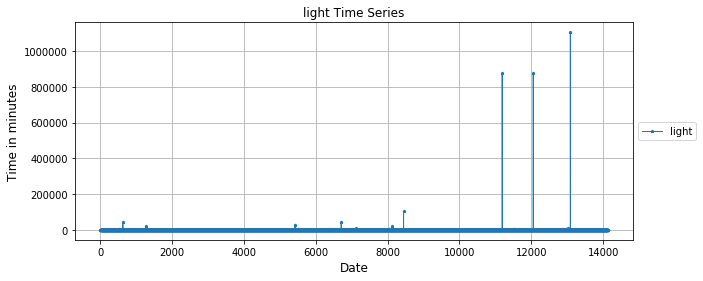

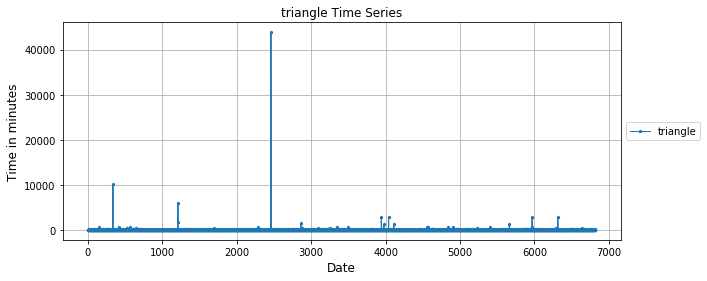

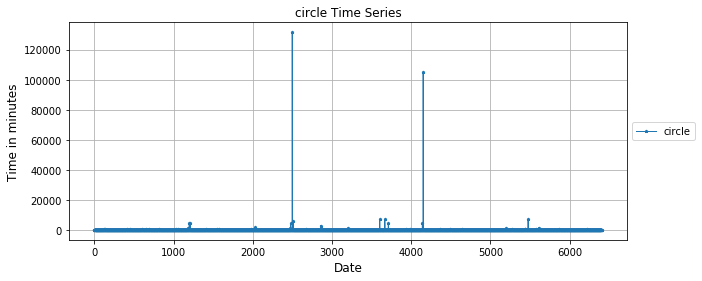

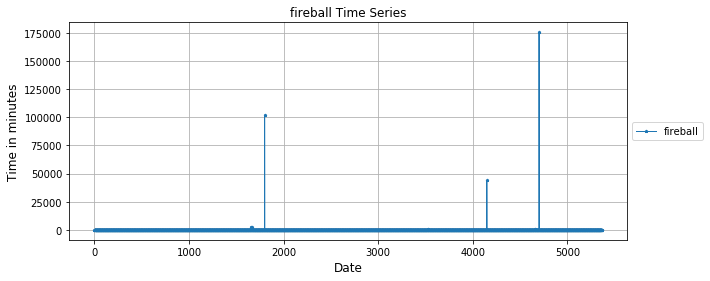

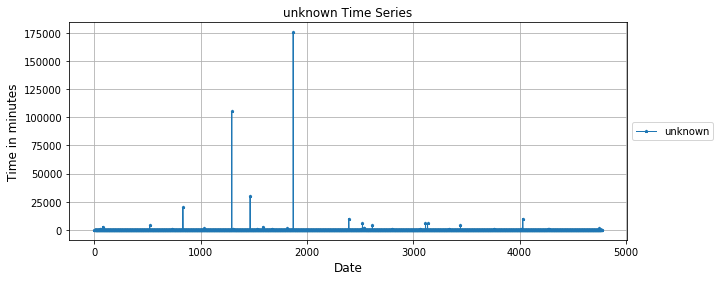

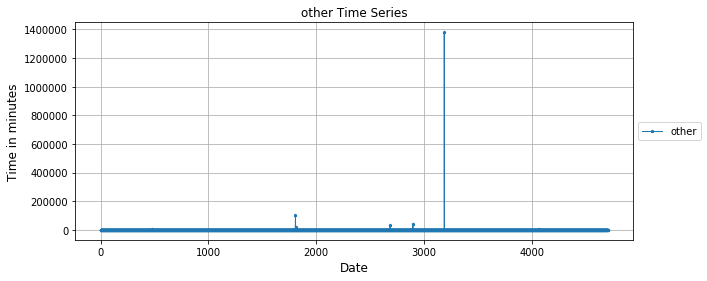

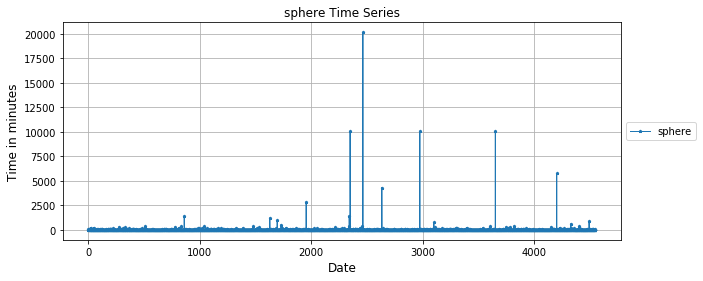

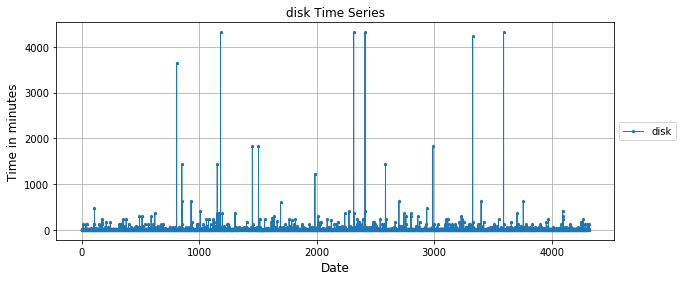

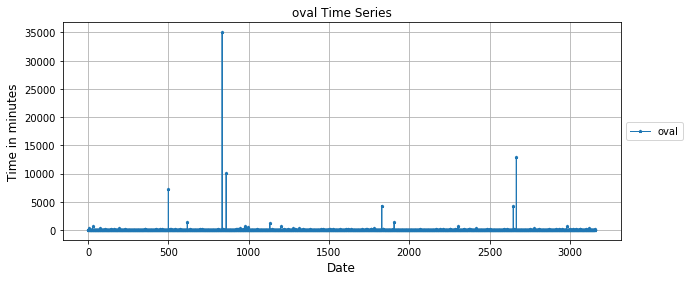

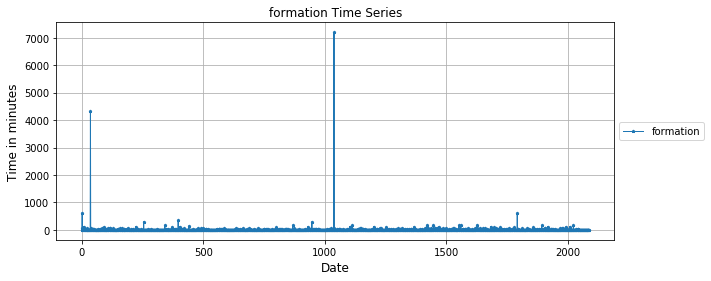

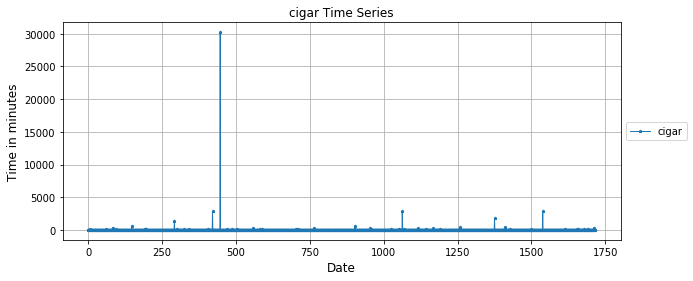

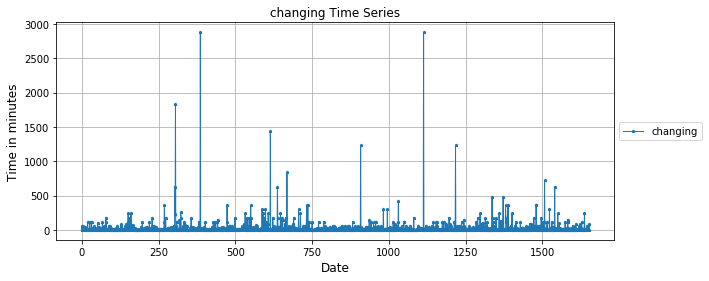

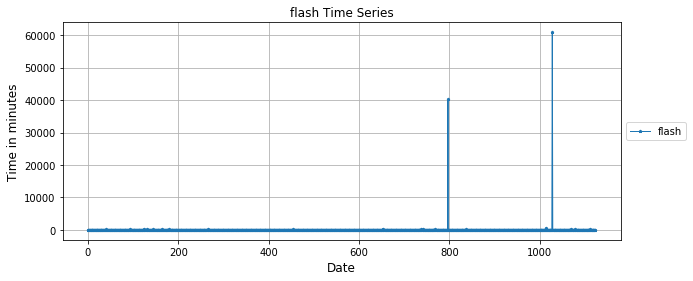

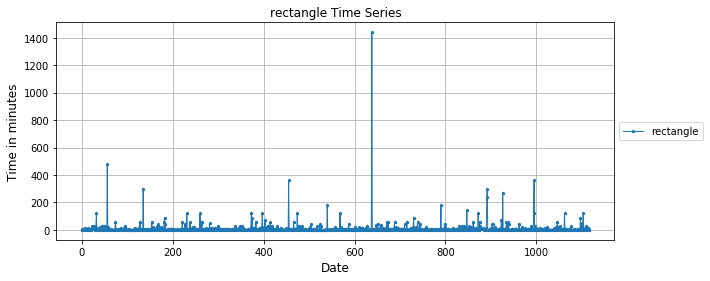

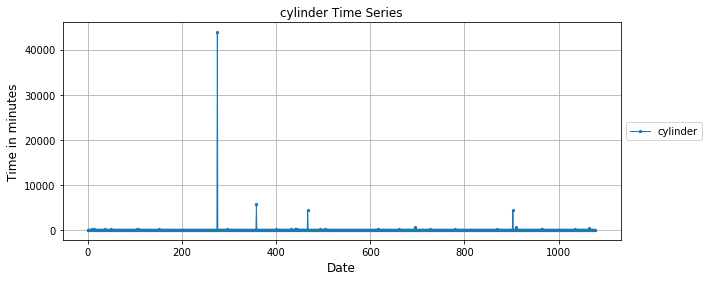

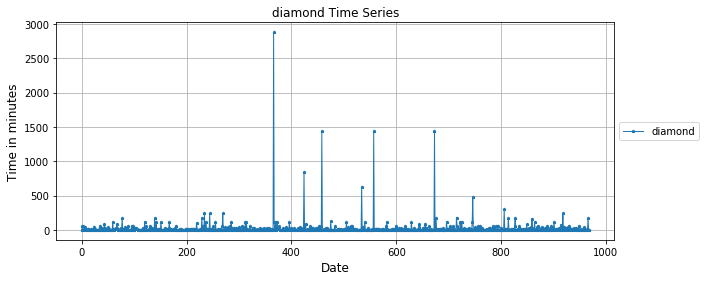

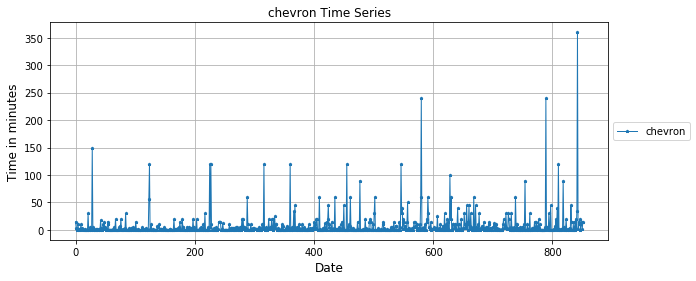

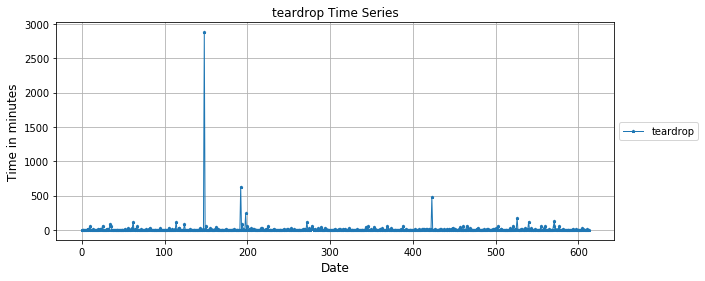

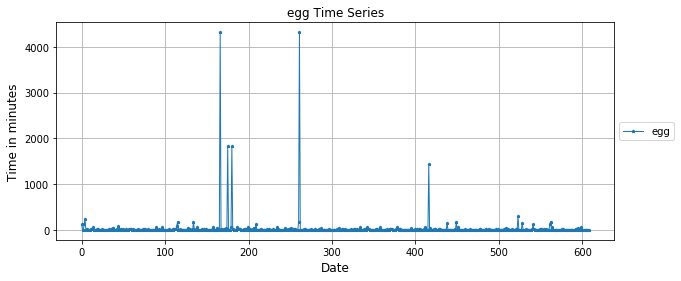

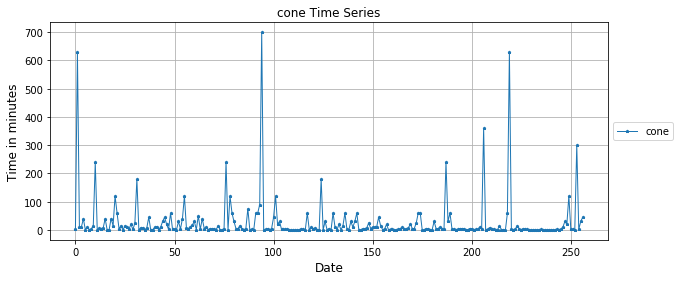

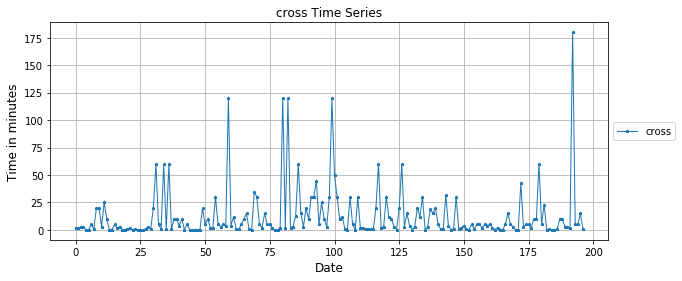

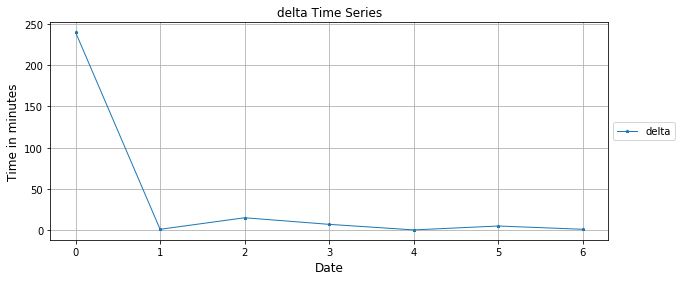

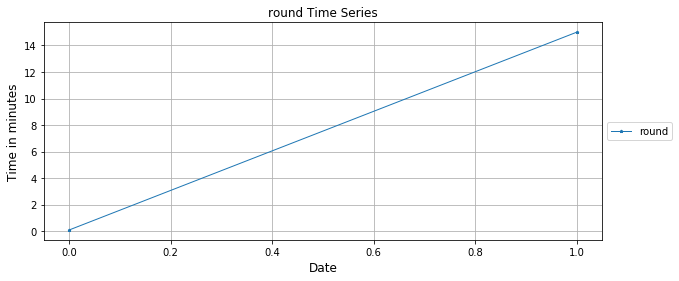

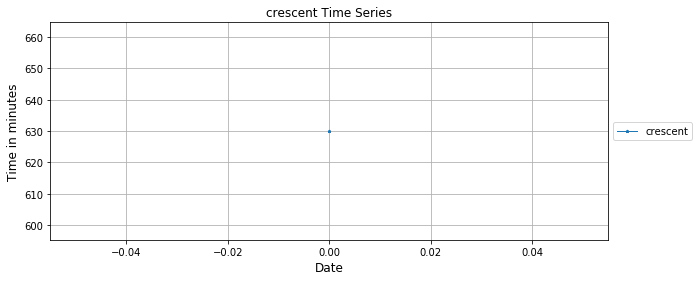

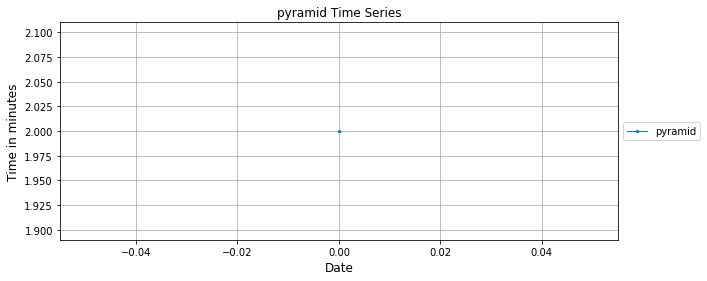

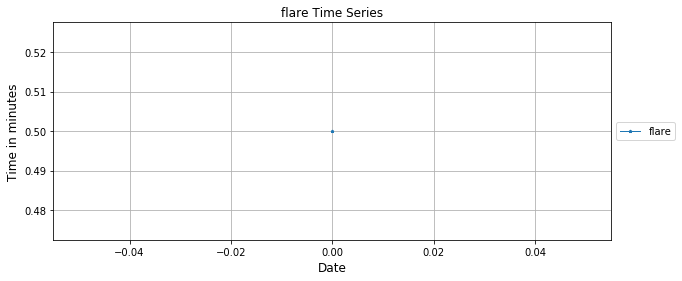

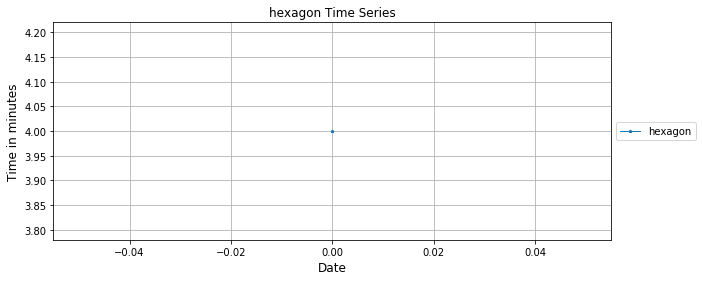

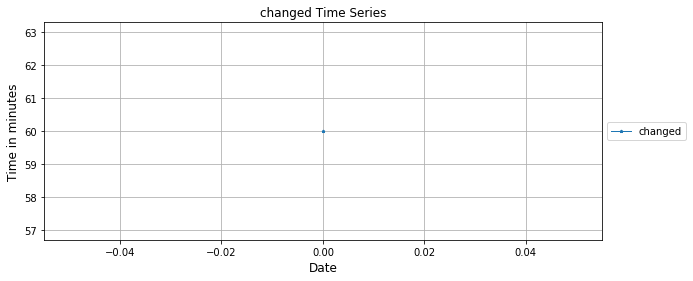

In [42]:
plt.figure(figsize=(12,6))
#plt.hist(Dic_shapes['cross']/60,bins=50,**kwargs)
for shape in Dic_shapes:
    plt.figure(figsize=(10,4))

    plt.plot(Dic_shapes[shape]/60,label = str(shape),linewidth = 1, marker = '*',markersize=3)
#plt.legend(loc='best')
#plt.plot(Dic_shapes['cross']/60,label='disk')

    plt.title(str(shape)+' '+'Time Series')
    plt.ylabel('Time in minutes',fontsize = 12)
    plt.xlabel('Date', fontsize =12)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.grid()
    plt.show()

In [43]:
### We have many outlayers for some cases, we can see that the time isnt consistent
### 1,400,000 What is that ?? Around 972 days, What?? Lets see.

In [44]:
data2.loc[data2['duration (seconds)'] >100000]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1110,10/12/2007 23:00,rogers,ar,us,unknown,172800.0,1-2 days,((HOAX??)) abduction. 500 Lights On Object0: Yes,3/4/2008,36.3319444,-94.118333
1224,10/13/1969 21:15,millington,tn,us,formation,259200.0,72 hours,Star-like&#44 8-point inverted V-shape&#44 cha...,1/29/2002,35.3413889,-89.897222
2991,10/19/2008 23:09,laurel,ms,us,light,432000.0,5 days,Lights captured on wild game camera.,1/10/2009,31.6938889,-89.130556
3476,10/21/2007 01:00,maysville,ky,us,light,2631600.0,1 month,strange lights over maysville ky,11/28/2007,38.6411111,-83.744444
4123,10/23/2011 01:30,alamo,tn,us,triangle,604800.0,one week,Over the past week me and 7-10 of my friends h...,10/25/2011,35.7847222,-89.117222
7101,10/8/2008 21:00,ukiah,ca,us,light,1209600.0,2 weeks,&quot;Bright-Star or Something Else&quot;&#33 ...,10/31/2008,39.1502778,-123.206667
7634,11/10/1979 21:00,ypsilanti,mi,us,other,259200.0,3 days,object in orbit&#44 drops smaller objects&#44 ...,11/20/2001,42.2411111,-83.613056
8681,11/12/2003 01:00,huber heights,oh,us,unknown,259200.0,over 30days,The objects moved in a fasion not consistent w...,11/26/2003,39.8438889,-84.124722
10967,1/1/2001 19:00,north whitefield,me,us,light,109800.0,3 1/2 hours,I have seen this craft for years and would lik...,1/3/2001,44.2219444,-69.587778
12655,11/23/2013 17:30,coventry,ri,us,other,172800.0,days,A light over Rhode Island for more than 10 day...,12/2/2013,41.7000000,-71.683333


In [45]:
## As we can see, there are a lot of decoherence with this data
## Example 

In [46]:
data2.keys()

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [47]:
data2['comments'][74660] #Everything seems normal but

'Orange or amber balls or orbs of light multiplying and maneuvering beyond known and current aircraft abilities'

In [48]:
print(data2['datetime'][74660],'   ',data2['duration (hours/min)'][74660],'     ',data2['date posted'][74660])

9/15/1991 18:00     21 years       3/31/2008


In [49]:
#The event occured in 91 and was reported in 2008 however the duration is 21 years: 1991 + 21 = 2012, Is this event still happen?
## Some events like abduction may occur, then the next question is: Should we keep or remove those events??
### I will remove the data that contains more than 1 day  = 86400s of duration

In [50]:
df2 = df.loc[df['duration (seconds)'] <= 86400]

In [51]:
Dictionary_shapes = {}     ### Empty Dictionary

In [52]:
for shape in df2['shape'].value_counts().index:### Exacting the shape and its time duration
    if (shape in ['flare' ,'hexagon', 'crescent' , 'pyramid' ,  'changed' , 'round'] )== False: ## Just a ponit in these shapes
        a = df2.loc[df2['shape'] == shape].values
        Dictionary_shapes[shape] = a[:,1].astype(float)    ### I have now the data save it in a dictionary. 
                                                ### Each shape has its own values

<Figure size 864x432 with 0 Axes>

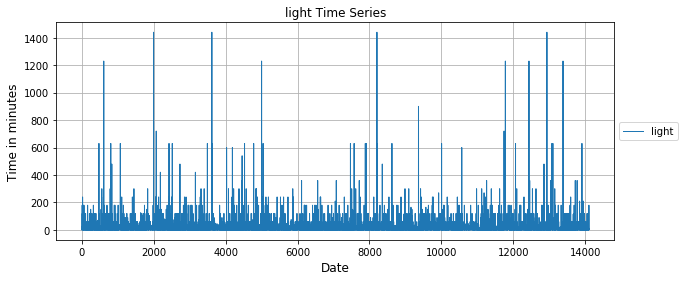

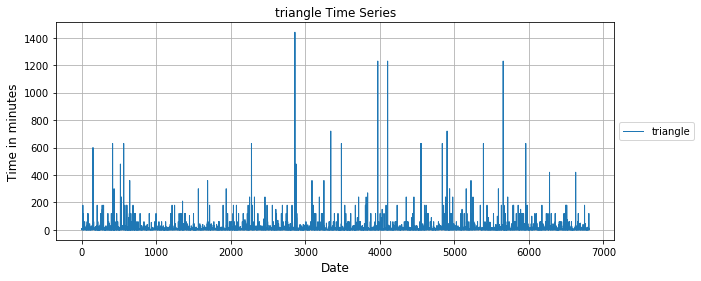

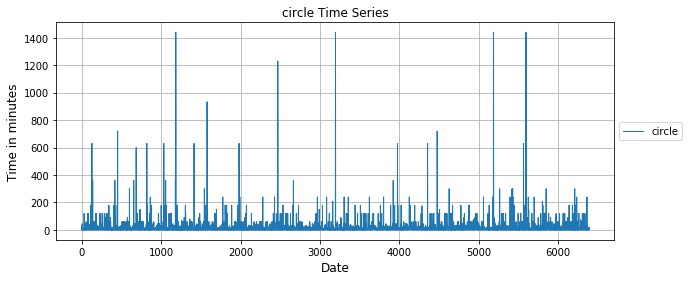

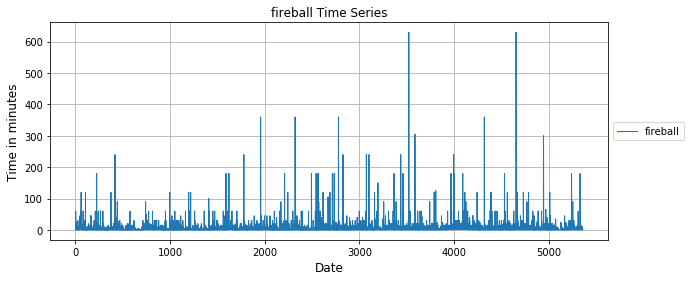

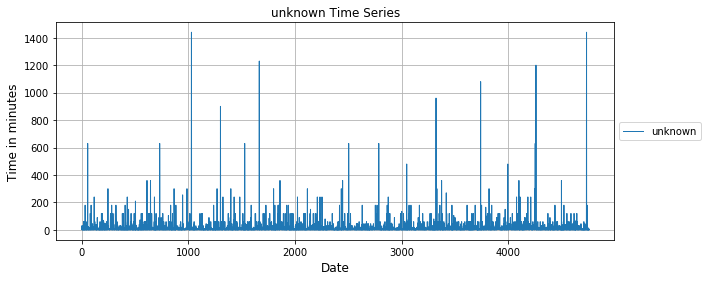

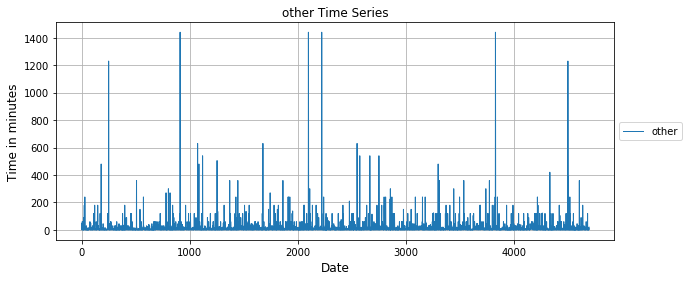

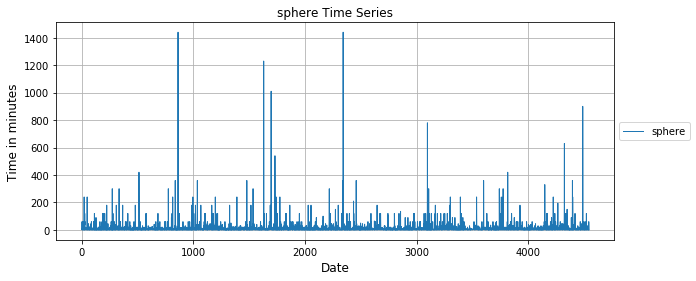

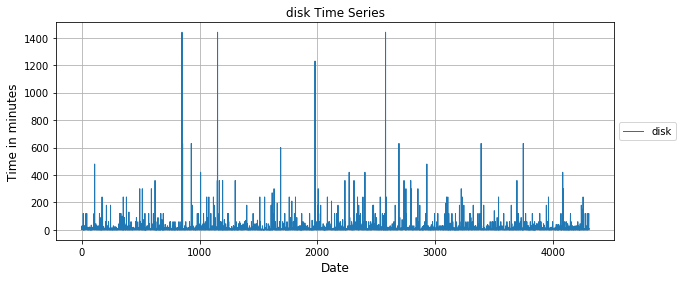

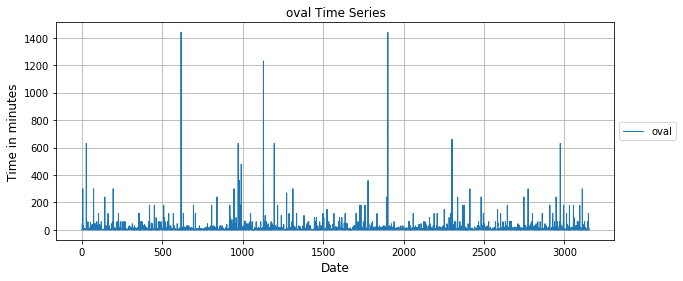

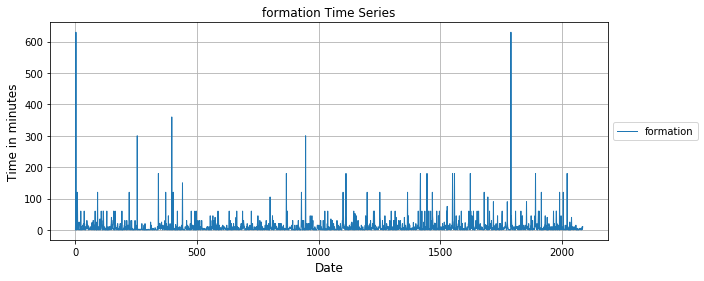

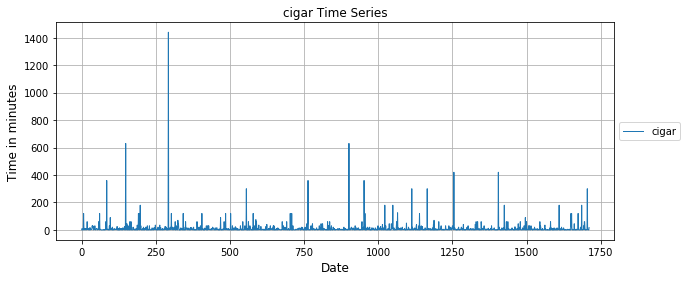

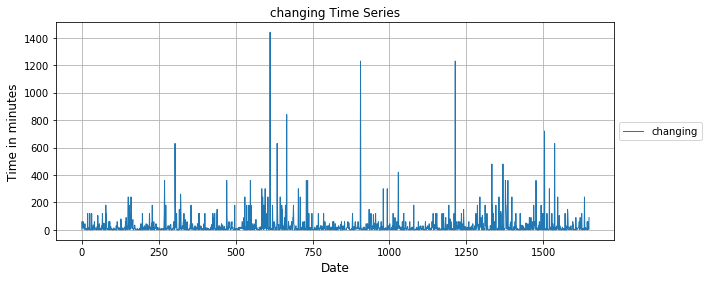

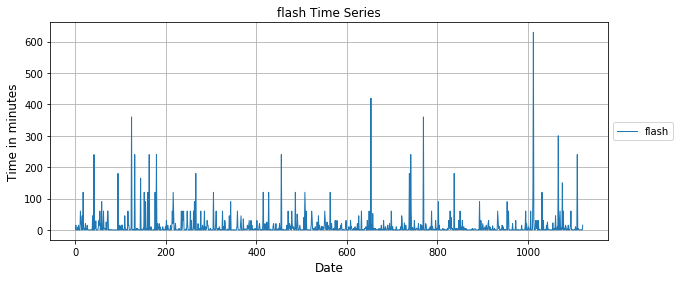

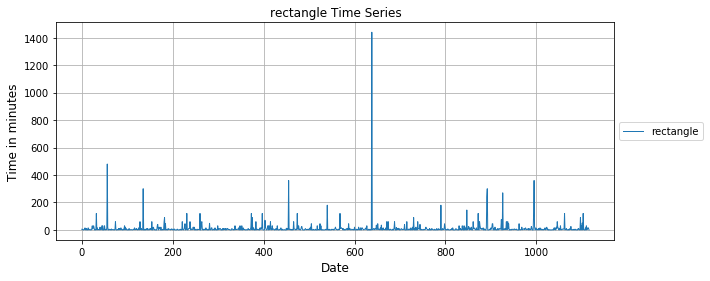

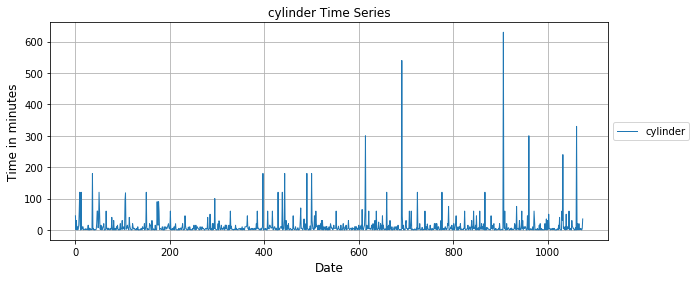

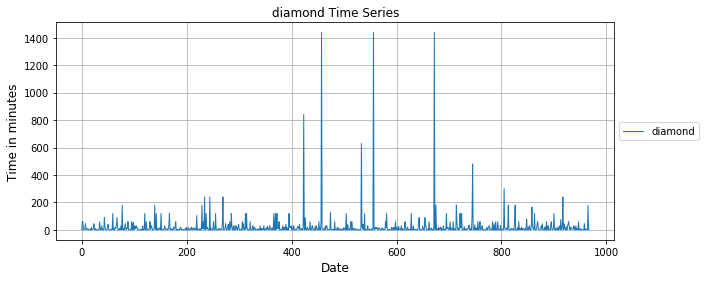

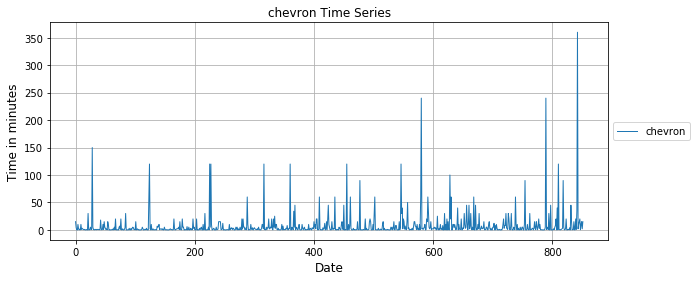

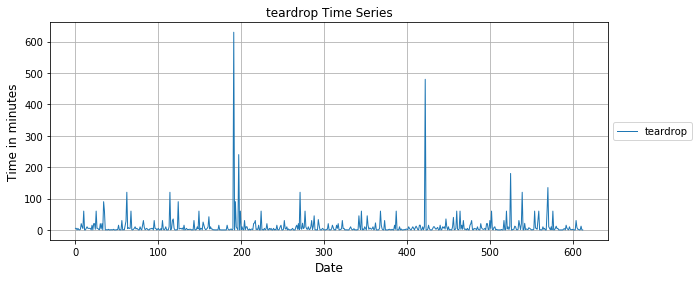

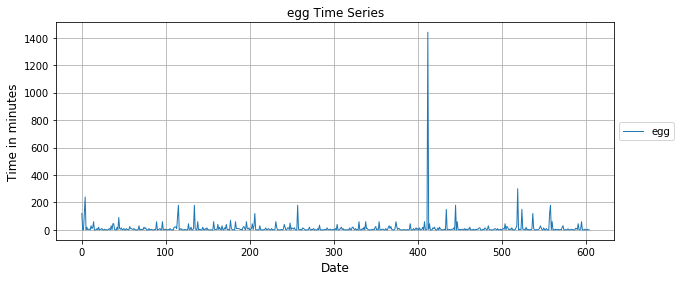

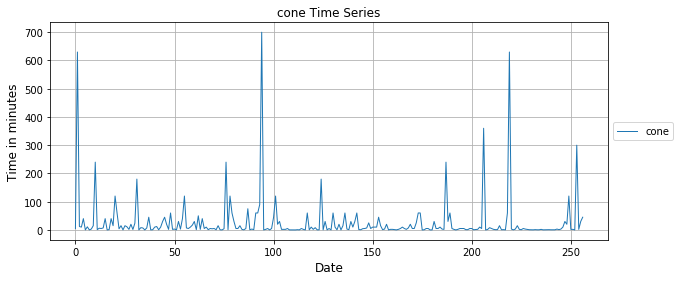

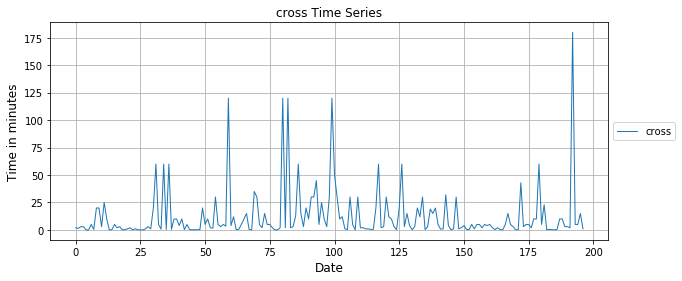

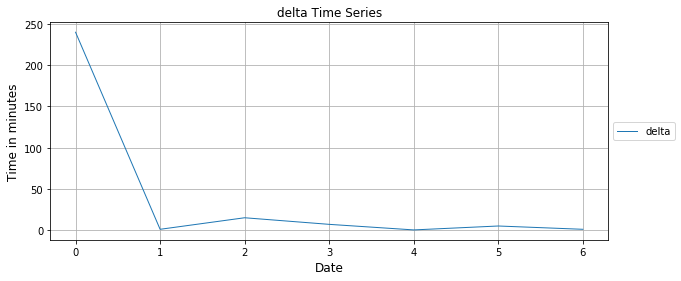

In [53]:
##Time series again, this time with less outlayers
plt.figure(figsize=(12,6))
#plt.hist(Dic_shapes['cross']/60,bins=50,**kwargs)
for shape in Dictionary_shapes:
    plt.figure(figsize=(10,4))

    plt.plot(Dictionary_shapes[shape]/60,label = str(shape),linewidth = 1)
#plt.legend(loc='best')
#plt.plot(Dic_shapes['cross']/60,label='disk')

    plt.title(str(shape)+' '+'Time Series')
    plt.ylabel('Time in minutes',fontsize = 12)
    plt.xlabel('Date', fontsize =12)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.grid()
    plt.show()

In [54]:
np.mean(Dictionary_shapes['delta'])

2307.8571428571427

In [55]:
np.std(Dictionary_shapes['delta'])

4944.844253753353

In [56]:
Dic_momentos = {}

In [57]:
Dic_shape_prob = {}

In [58]:
for shape in Dictionary_shapes:
    Dic_shape_prob[shape] = len(Dictionary_shapes[shape])/len(df2)

In [59]:
a = 0
for shape in Dic_shape_prob:
    a = a + Dic_shape_prob[shape]
    

In [60]:
for shape in Dic_shape_prob:
    print('Prob',shape,'  ',"%3.4f"% (Dic_shape_prob[shape]*100)+'%')
#Dic_shape_prob

Prob light    21.2486%
Prob triangle    10.2553%
Prob circle    9.6272%
Prob fireball    8.0714%
Prob unknown    7.1647%
Prob other    7.0683%
Prob sphere    6.8454%
Prob disk    6.4915%
Prob oval    4.7504%
Prob formation    3.1418%
Prob cigar    2.5785%
Prob changing    2.4851%
Prob flash    1.6899%
Prob rectangle    1.6824%
Prob cylinder    1.6191%
Prob diamond    1.4579%
Prob chevron    1.2832%
Prob teardrop    0.9233%
Prob egg    0.9112%
Prob cone    0.3871%
Prob cross    0.2967%
Prob delta    0.0105%


In [61]:
a ## Prob

0.999894570374275

In [62]:
for shape in Dictionary_shapes:
    
    Dic_momentos[shape] = [np.mean(Dictionary_shapes[shape]) ,np.std(Dictionary_shapes[shape])]
    
    #print(shape)

In [63]:
Dic_momentos['delta'][0]

2307.8571428571427

### Gaussian distibution
$$ f(\hat{E}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp{\left(-\frac{(\hat{E}-\mu)^{2}}{\sigma}\right)}$$
$$ g(\hat{E}) = \frac{1}{\sqrt{2\pi}}\exp{\left(-\hat{E}^{2}\right)}\{1+\frac{\mu_{3}}{6}He_{3}(\hat{E})+
\frac{\mu_{4}}{24}He_{4}(\hat{E})\frac{\mu_{3}^{2}}{72}He_{6}(\hat{E})\}$$

In [65]:
def gaussian(mu = 0 ,sigma = 1):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )

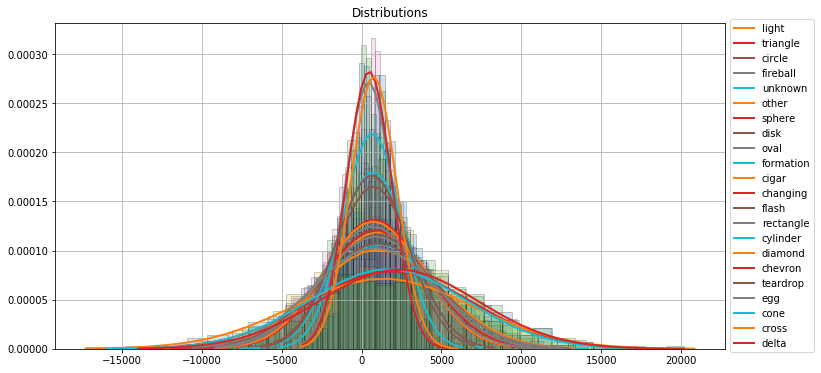

In [66]:
plt.figure(figsize=(12,6))

for shape in Dic_momentos:
    s = np.random.normal(Dic_momentos[shape][0], Dic_momentos[shape][1], 1000)

    count, bins, _ = plt.hist(s, bins = 30, **kwargs)
    plt.plot(bins, gaussian(Dic_momentos[shape][0],Dic_momentos[shape][1]) ,linewidth=2,label = str(shape))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distributions')
    
plt.grid()    
plt.show()

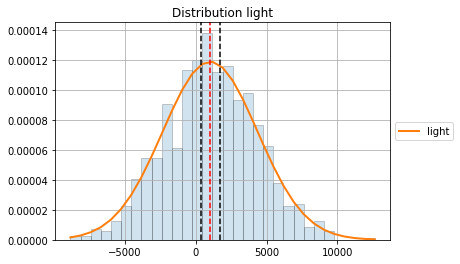

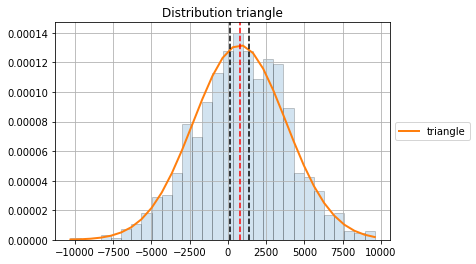

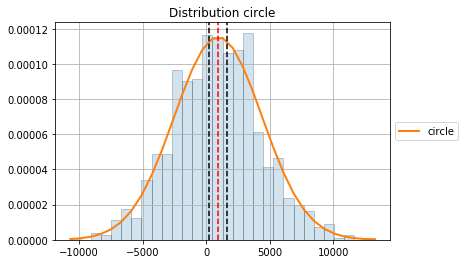

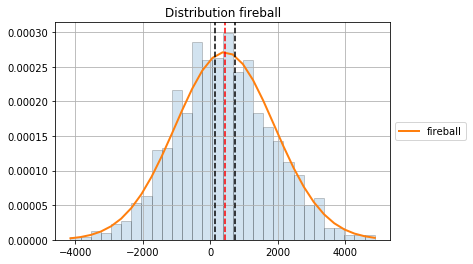

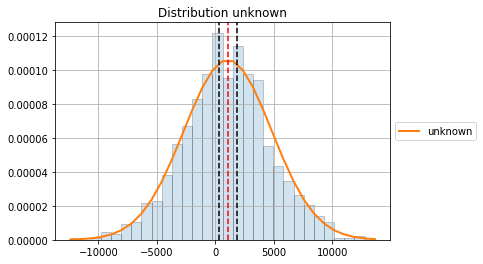

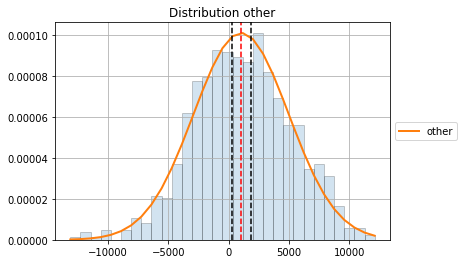

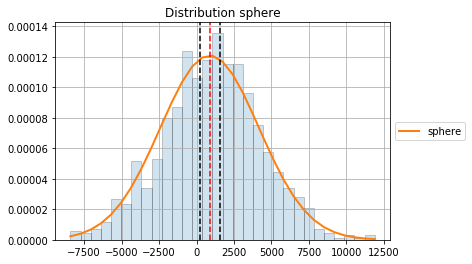

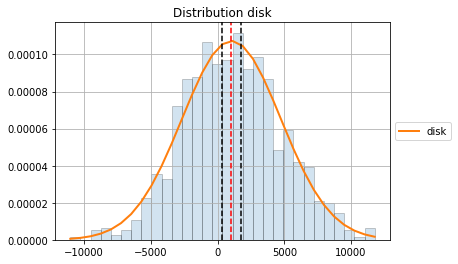

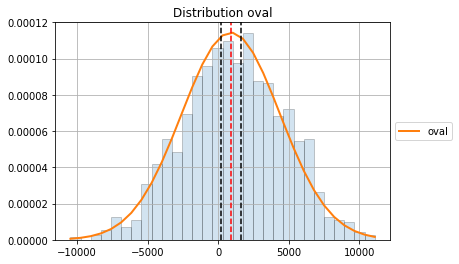

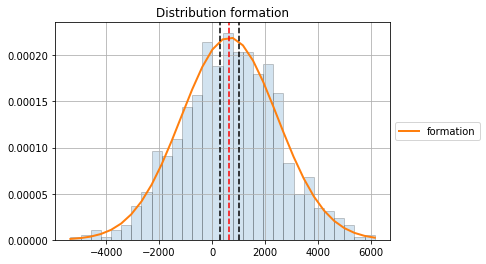

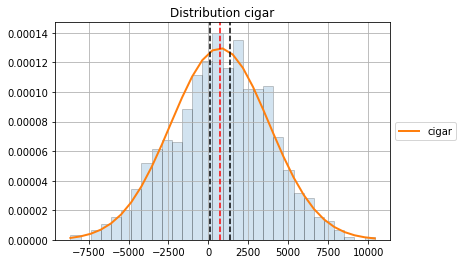

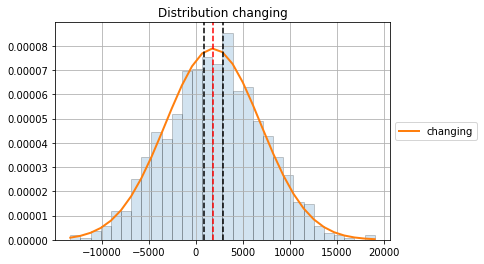

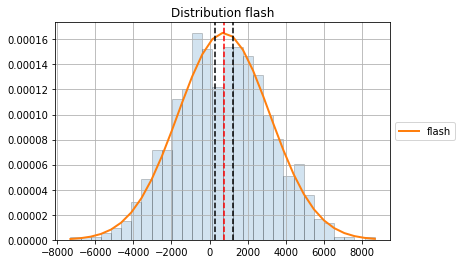

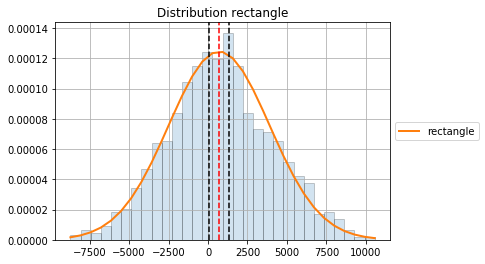

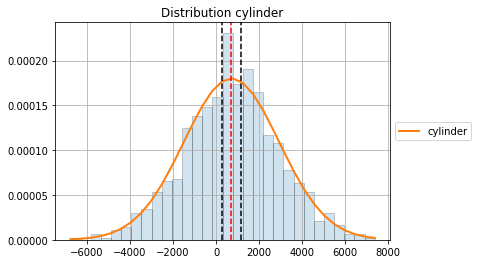

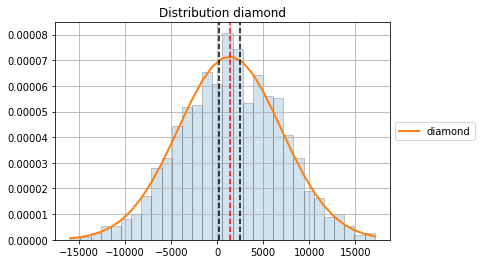

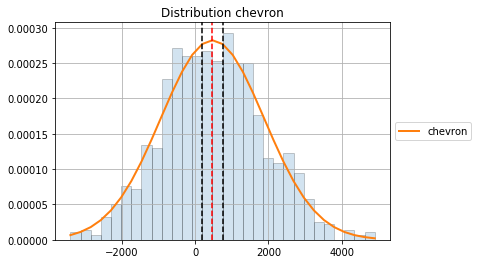

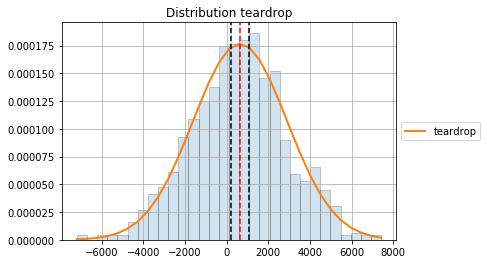

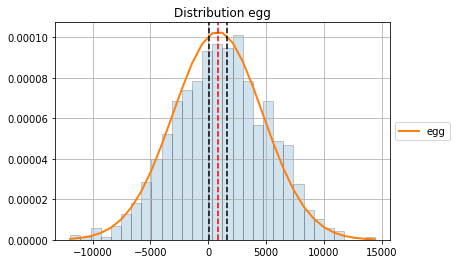

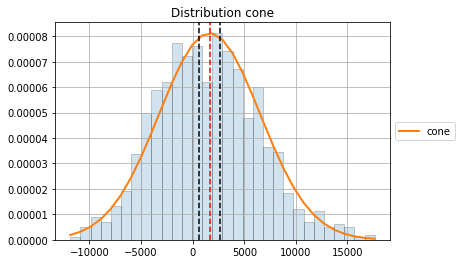

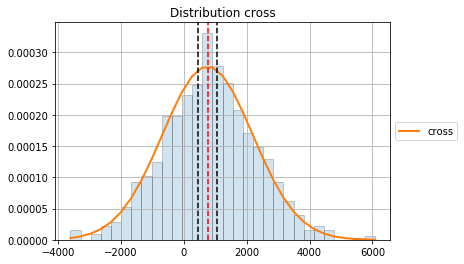

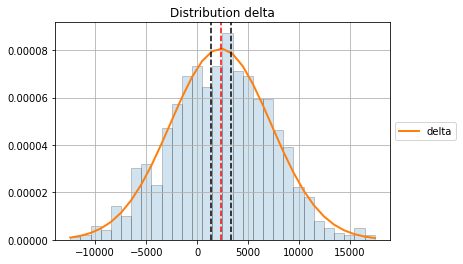

In [67]:
### I'm trying to predict values between mean+ (1/5)std and mean  - (1/5)std
for shape in Dic_momentos:
    s = np.random.normal(Dic_momentos[shape][0], Dic_momentos[shape][1], 1000)

    count, bins, _ = plt.hist(s, bins = 30, **kwargs)
    plt.plot(bins, gaussian(Dic_momentos[shape][0],Dic_momentos[shape][1]) ,linewidth=2,label = str(shape))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title('Distribution' +' '+str(shape))
    
    plt.axvline(Dic_momentos[shape][0],color = 'red',linestyle = '--' )
    plt.axvline(Dic_momentos[shape][0]+0.20*Dic_momentos[shape][1],color = 'black',linestyle = '--' )
    plt.axvline(Dic_momentos[shape][0]-0.20*Dic_momentos[shape][1],color = 'black',linestyle = '--' )
    #plt.axvline(0.0,color = 'black',linestyle = '--' )

    plt.grid()    
    plt.show()

In [68]:
def lost_shape(time,diff = 100):  
    s = []
    for shape in Dic_momentos:
        if abs(Dic_momentos[shape][0] - time ) <= diff:
            s.append(Dic_shape_prob[shape])
    dic2 = {v: k for k, v in Dic_shape_prob.items()}

    if len(s) >= 1:
        name = max(s) 
        return dic2[name]
        
    if len(s) == 0:
        return 'unknown'

In [69]:
lost_shape(434)

'fireball'

In [70]:
for x in [1000, 1500, 500]:
    print(lost_shape(x))

light
unknown
fireball


In [71]:
n = 0 
for shape in Dic_momentos:
    print(shape,' : ',lost_shape(Dic_momentos[shape][0]))
    if shape == lost_shape(Dic_momentos[shape][0]):
        n = n + 1
print('accuracy=','  ',"%3.2f"% (n*100/len(Dic_momentos))+'%')

light  :  light
triangle  :  triangle
circle  :  light
fireball  :  fireball
unknown  :  light
other  :  light
sphere  :  circle
disk  :  light
oval  :  circle
formation  :  formation
cigar  :  triangle
changing  :  changing
flash  :  triangle
rectangle  :  triangle
cylinder  :  triangle
diamond  :  diamond
chevron  :  fireball
teardrop  :  formation
egg  :  triangle
cone  :  cone
cross  :  triangle
delta  :  delta
accuracy=    36.36%


In [72]:
n = 0
for shape in Dic_momentos:
    print(shape,' : ',lost_shape(Dic_momentos[shape][0],20))
    if shape == lost_shape(Dic_momentos[shape][0],20):
        n = n + 1
print('accuracy=','  ',"%3.2f"% (n*100/len(Dic_momentos))+'%')

light  :  light
triangle  :  triangle
circle  :  circle
fireball  :  fireball
unknown  :  unknown
other  :  light
sphere  :  sphere
disk  :  other
oval  :  sphere
formation  :  formation
cigar  :  cigar
changing  :  changing
flash  :  flash
rectangle  :  rectangle
cylinder  :  cigar
diamond  :  diamond
chevron  :  chevron
teardrop  :  formation
egg  :  egg
cone  :  cone
cross  :  triangle
delta  :  delta
accuracy=    72.73%


In [73]:
n = 0
for shape in Dic_momentos:
    print(shape,' : ',lost_shape(Dic_momentos[shape][0],1))
    if shape == lost_shape(Dic_momentos[shape][0],1):
        n = n + 1
print('accuracy=','  ',"%3.2f"% (n*100/len(Dic_momentos))+'%')

light  :  light
triangle  :  triangle
circle  :  circle
fireball  :  fireball
unknown  :  unknown
other  :  other
sphere  :  sphere
disk  :  disk
oval  :  oval
formation  :  formation
cigar  :  cigar
changing  :  changing
flash  :  flash
rectangle  :  rectangle
cylinder  :  cylinder
diamond  :  diamond
chevron  :  chevron
teardrop  :  teardrop
egg  :  egg
cone  :  cone
cross  :  cross
delta  :  delta
accuracy=    100.00%


In [74]:
test = df2.values

In [75]:
n = 0
#for i in range(len(test)):
for i in range(20):
    print(test[i,0],' : ',lost_shape(test[i,1],200))
    if test[i,0] == lost_shape(test[i,1],200):
          n = n + 1
print('accuracy=','  ',"%3.2f"% (n*100/20)+'%')

cylinder  :  unknown
circle  :  unknown
light  :  light
sphere  :  fireball
disk  :  light
disk  :  unknown
disk  :  unknown
circle  :  fireball
fireball  :  unknown
disk  :  changing
unknown  :  unknown
oval  :  unknown
circle  :  light
disk  :  unknown
disk  :  changing
other  :  unknown
light  :  light
light  :  fireball
oval  :  unknown
other  :  unknown
accuracy=    15.00%


In [76]:
n = 0
for i in range(len(test)):
#for i in range(50):
    #print(test[i,0],' : ',lost_shape(test[i,1],200))
    if test[i,0] == lost_shape(test[i,1],200):
          n = n + 1
print('accuracy=','  ',"%3.2f"% (n*100/len(test))+'%') #This is not a good approax at all!

accuracy=    8.66%


### Conclusions so far, if you want to see some UFOs, the best a place is California with around 13% of chances, and you will see lights as the most probably shape.
### Why is this model bad ???. I would not say bad at all, apparently there is not relation between shape and time, I would see a ship or a similar object I would expect this object remains more time visible than a flashing light. Lights is the most probably shape due to in the night any brilliant object is very visible.
### My impresions so far, this data is impure. In my experience, It is frecuently find patterns working with data and humans. I can do something else 
### What is next ?? 

### 3.2 Case 2: Clusters

### We can classify our data by state, country or shape
###  given a state, what is the probability to see certain shape? or given a shape, what is the probability to see it in some state? This is called a Naive Bayes Method.
### I did clusters to collect duration given a shape

### 3.3 Case 3. Time Series Analisy.

### This data in particular is sorted by dates, We can obtain time series by states and look for correlation, trend, pattern and more.

### Se acabo el timpo :( para remplazar los valores de country y estado, pero es facil e importante debido a que corresponde a un aprox de 12% de los datos faltantes. Hay que usar un dicionario para asignar estado a paises y viceverza. Digamos que tenemos [ny   NaN], en el diccionario tendriamos D[ny] = us, por lo que seria facil replazarlo con la función para remover Nans. 
### Podriamos usar una paqueteria extra como geopy para completar state, country y city dada su longitud y latitud.